In [367]:
import numpy as np
import matplotlib.pyplot as plt

In [368]:
def box_muller(N):
    a1 = np.random.uniform(size = N)
    a2 = np.random.uniform(size = N)
    return M + D * np.sqrt(-2 * np.log(a1)) * np.cos(2 * np.pi * a2)

In [556]:
def calc_probs(bins):
    return np.exp(- (bins - M) ** 2 / (2 * D ** 2)) / (D * np.sqrt(2 * np.pi))

def calc_chi_square(n, bins):
    p = calc_probs(bins)
    print(n, p)
    return np.sum( (n - p) ** 2 / p )

[0.3 0.3 0.2 0.2] [0.08221392 0.2610772  0.39811621 0.2915198 ]
[0.01 0.02 0.21 0.15 0.24 0.16 0.15 0.06] [0.0103343  0.04445362 0.1321012  0.27119385 0.38461509 0.37683066
 0.25505836 0.11926316]
[0.002 0.011 0.033 0.119 0.199 0.234 0.218 0.104 0.051 0.022 0.007] [0.00155875 0.00916297 0.03834677 0.11424956 0.24233348 0.3659363
 0.39339672 0.30108503 0.16405171 0.06363639 0.01757371]
[0.0008 0.003  0.0124 0.0341 0.0754 0.133  0.1819 0.1944 0.1673 0.1099
 0.0545 0.0228 0.0079 0.0026] [0.00059198 0.00311945 0.01287433 0.04161472 0.10535259 0.2088909
 0.3243918  0.39454473 0.37583625 0.28039943 0.16384441 0.07498289
 0.02687625 0.00754486]
[1.2000e-04 5.6000e-04 2.5500e-03 8.9600e-03 2.6260e-02 5.7830e-02
 1.1141e-01 1.5762e-01 1.8549e-01 1.7584e-01 1.3371e-01 8.0160e-02
 3.9120e-02 1.4480e-02 4.6600e-03 9.9000e-04 1.8000e-04 6.0000e-05] [7.13748783e-05 4.61114775e-04 2.37406378e-03 9.74081771e-03
 3.18506381e-02 8.29966471e-02 1.72354508e-01 2.85236064e-01
 3.76188842e-01 3.95391268e-01

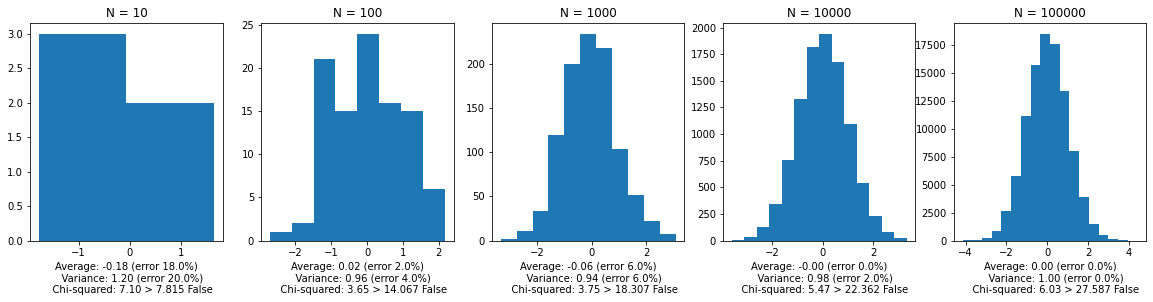

In [558]:
M = 0
D = 1
f, axes = plt.subplots(1, 5, figsize=(20, 4))
critical_vals = [7.815, 14.067, 18.307, 22.362, 27.587]

for i in range(5):
    N = 10**(i + 1)
    X = box_muller(N)
    k = int(np.round(np.log2(N))) + 1
    
    M_ = X.mean()
    D_ = X.var()

    (n, bins, patches) = axes[i].hist(X, bins=k)
    
    chi_square = calc_chi_square(n.astype('int') / N, bins[:-1])                                                                                        * 10
        
    axes[i].set_title(f'N = {N}')
    axes[i].set_xlabel(f'''Average: {M_:.2f} (error {np.round(np.abs(M_ - M) * 100)}%)
    Variance: {D_:.2f} (error {np.round(np.abs(D_ - D) * 100)}%)
    Chi-squared: {chi_square:.2f} > {critical_vals[i]} {chi_square > critical_vals[i]}''')
    